# Wind Speed Time Series

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
import pickle
import time
import datetime
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools
from salishsea_tools import grid_tools
from salishsea_tools import utilities
from labellines import labelLine, labelLines
%matplotlib inline

In [3]:
winddata = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1")
wind_times = winddata.time.values.astype('datetime64[s]').astype(datetime.datetime)

### Extract timeseries from dictionary pickle files

In [11]:
years = [2015,2016,2017,2018]
abbrs = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
locs = ['salmon' ,'turn', 'sog']
loc_coords = [(99, 159),(115, 149),(143, 141)]

for year in years:
    filename = "/home/abhudia/Desktop/Wind speed/y{}_data.pickle".format(str(year))
    loader = open(filename, "rb")
    wind_year = pickle.load(loader)
    locals()['salmon'] = np.array([])
    locals()['turn'] = np.array([])
    locals()['sog'] = np.array([])
    for abbr in abbrs:
        for index in range(3): 
            locals()[locs[index]] = np.append(locals()[locs[index]],wind_year[abbr + '_data'].isel(gridY = loc_coords[index][0],gridX = loc_coords[index][1]).values)
    for index in range(3):
        fname = "winds_{}{}.pickle".format(locs[index], year)
        picklefile = open(fname, 'wb')
        pickle.dump(locals()[locs[index]], picklefile)
        picklefile.close()
        locals()[locs[index]] = False

## Make Timeseries For Each Point

In [12]:
years = [2015,2016,2017,2018]
abbrs = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sept', 'oct' ,'nov' ,'dec']
locs = ['salmon' ,'turn', 'sog']
for year in [2015, 2016, 2017, 2018]:
    for loc in locs:
        fname = "winds_{}{}.pickle".format(loc, str(year))
        file = open(fname, "rb") 
        locals()["winds_{}".format(loc) + str(year)] = pickle.load(file)
        locals()["t_{}".format(loc) + str(year)] = []
        for time in wind_times: 
            if time.year == year:
                locals()["t_{}".format(loc) + str(year)].append(time)

array(['2015-01-01', '2015-01-01', '2015-01-01', ..., '2015-12-31',
       '2015-12-31', '2015-12-31'], dtype='datetime64[D]')

In [29]:
labelLines(plt.gca().get_lines(),zorder=2.5)

In [40]:
f_day

[datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2015, 2, 1, 0, 0),
 datetime.datetime(2015, 3, 1, 0, 0),
 datetime.datetime(2015, 4, 1, 0, 0),
 datetime.datetime(2015, 5, 1, 0, 0),
 datetime.datetime(2015, 6, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 8, 1, 0, 0),
 datetime.datetime(2015, 9, 1, 0, 0),
 datetime.datetime(2015, 10, 1, 0, 0),
 datetime.datetime(2015, 11, 1, 0, 0),
 datetime.datetime(2015, 12, 1, 0, 0)]

# Make Plots

In [19]:
def average_output(data_array, times, period):

    unique, counts = np.unique(np.asarray(times).astype('datetime64[{}]'.format(period)).astype(datetime.datetime), return_counts=True) 
    index = 0; count_so_far = 0; means = []
    
    for count in counts:
        means.append(np.sum(data_array[count_so_far: count_so_far + count])/count)
        count_so_far = count_so_far + count
        
    return([unique, means])  

In [80]:
def std_dev_output(data_array, times, period):

    unique, counts = np.unique(np.asarray(times).astype('datetime64[{}]'.format(period)).astype(datetime.datetime), return_counts=True) 
    index = 0; count_so_far = 0; std_devs = []
    for count in counts:
        std_devs.append(np.std(data_array[count_so_far: count_so_far + count], ddof =1))
        count_so_far = count_so_far + count
        
    return([unique, std_devs]) 
    

In [9]:
a = np.array([1,2,3,4,5,6])
b = [1,2,3]
count_so_far = 0
means = []
for count in b:
    means.append(np.sum(a[count_so_far: count_so_far + count])/count)
    count_so_far = count_so_far + count


<xarray.DataArray (attributes: 2, times: 48)>
array([[4.168538, 4.808353, 4.787338, 5.360875, 4.320287, 6.456479, 6.014112,
        5.989306, 5.712445, 4.997067, 5.843138, 7.232103, 5.296028, 4.728221,
        6.258549, 5.130805, 5.714697, 4.598536, 5.75525 , 6.673844, 4.725864,
        5.777082, 6.328054, 5.731723, 5.266699, 5.175977, 5.569021, 5.128042,
        4.161665, 4.675006, 4.129129, 4.420839, 4.192667, 4.942408, 6.358577,
        4.284458, 5.923693, 4.714619, 4.055469, 4.968398, 3.816218, 4.324869,
        5.112053, 3.951626, 4.791057, 4.695027, 4.836514, 6.671178],
       [2.664046, 2.633385, 2.687246, 2.825573, 2.562797, 3.633924, 3.666958,
        3.537833, 3.196558, 2.547753, 3.368875, 3.735405, 2.875668, 2.617952,
        3.283535, 3.011177, 3.62024 , 2.733275, 3.638978, 3.57427 , 3.004247,
        3.307714, 3.065905, 3.161348, 3.00838 , 2.568106, 2.481537, 2.640172,
        2.727703, 2.863694, 2.923746, 3.003368, 2.694147, 2.801276, 3.020022,
        2.536527, 3.318769,

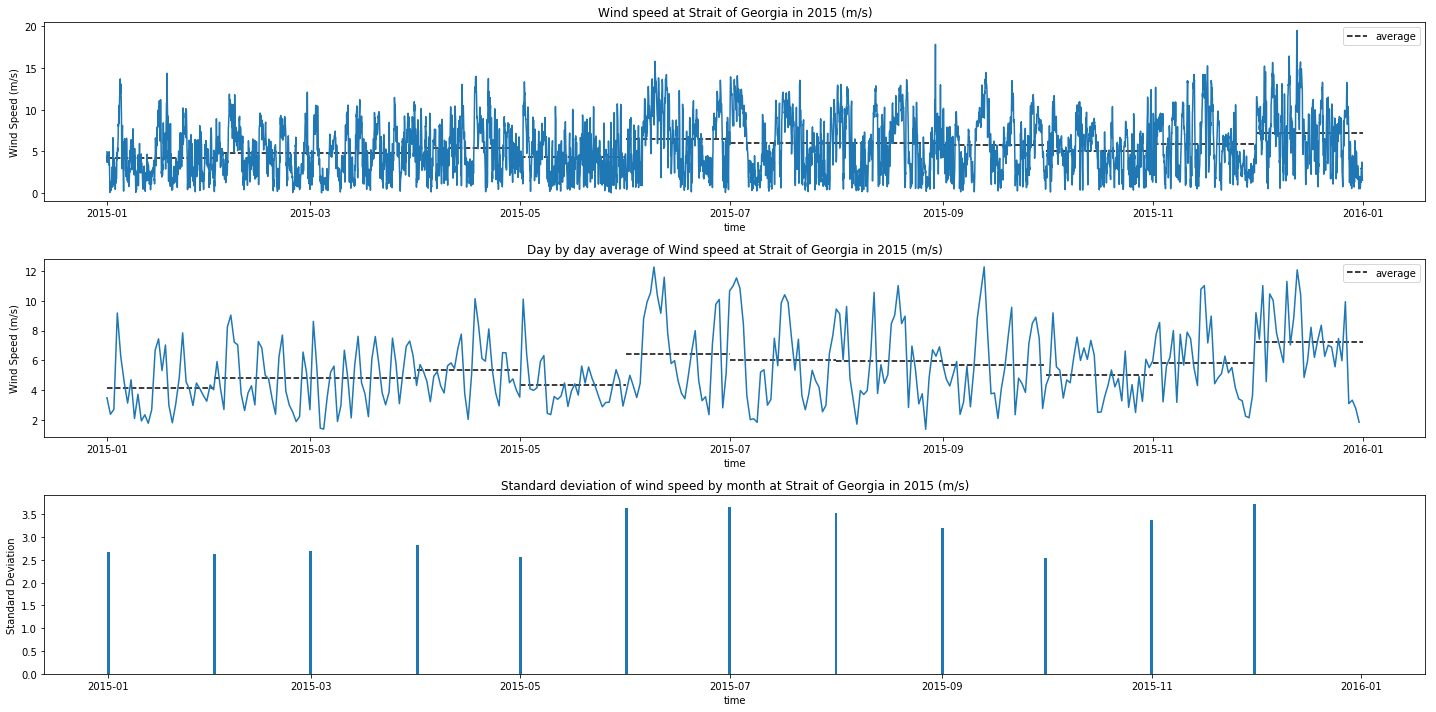

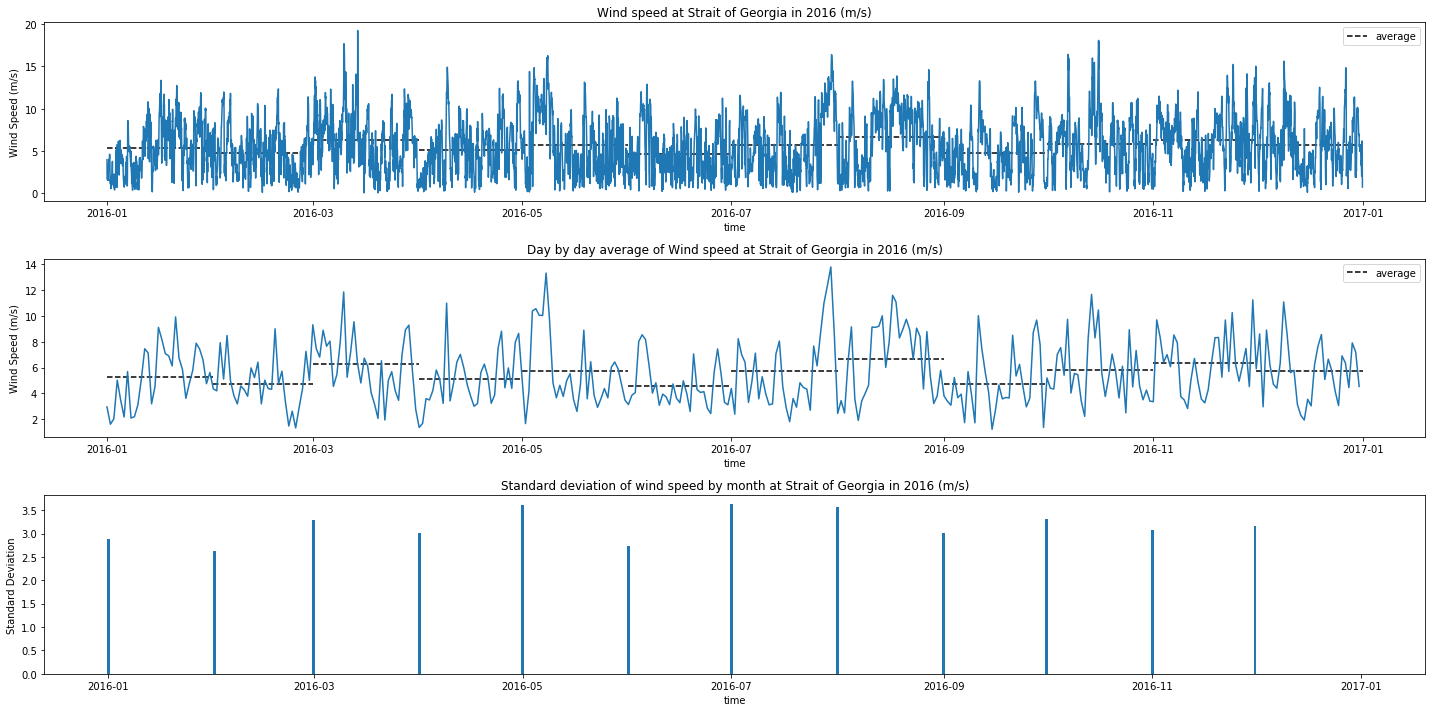

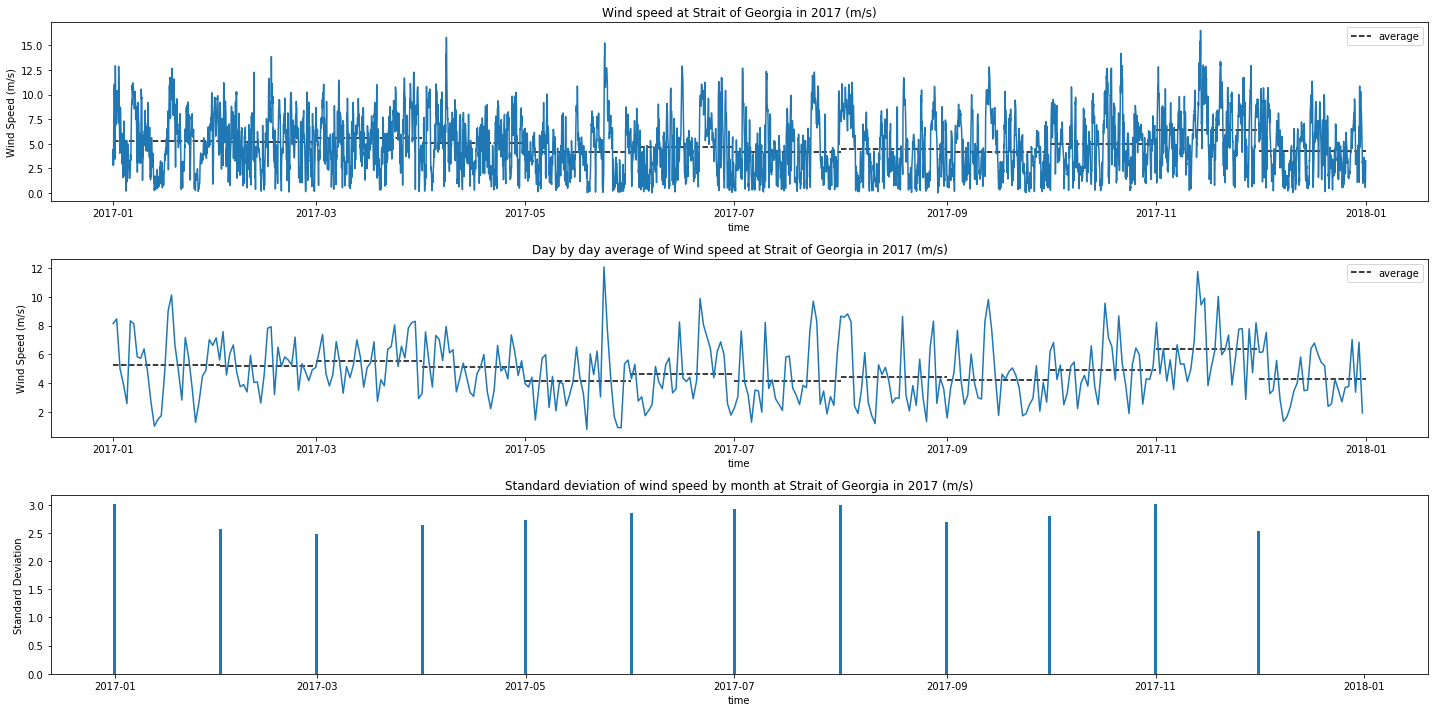

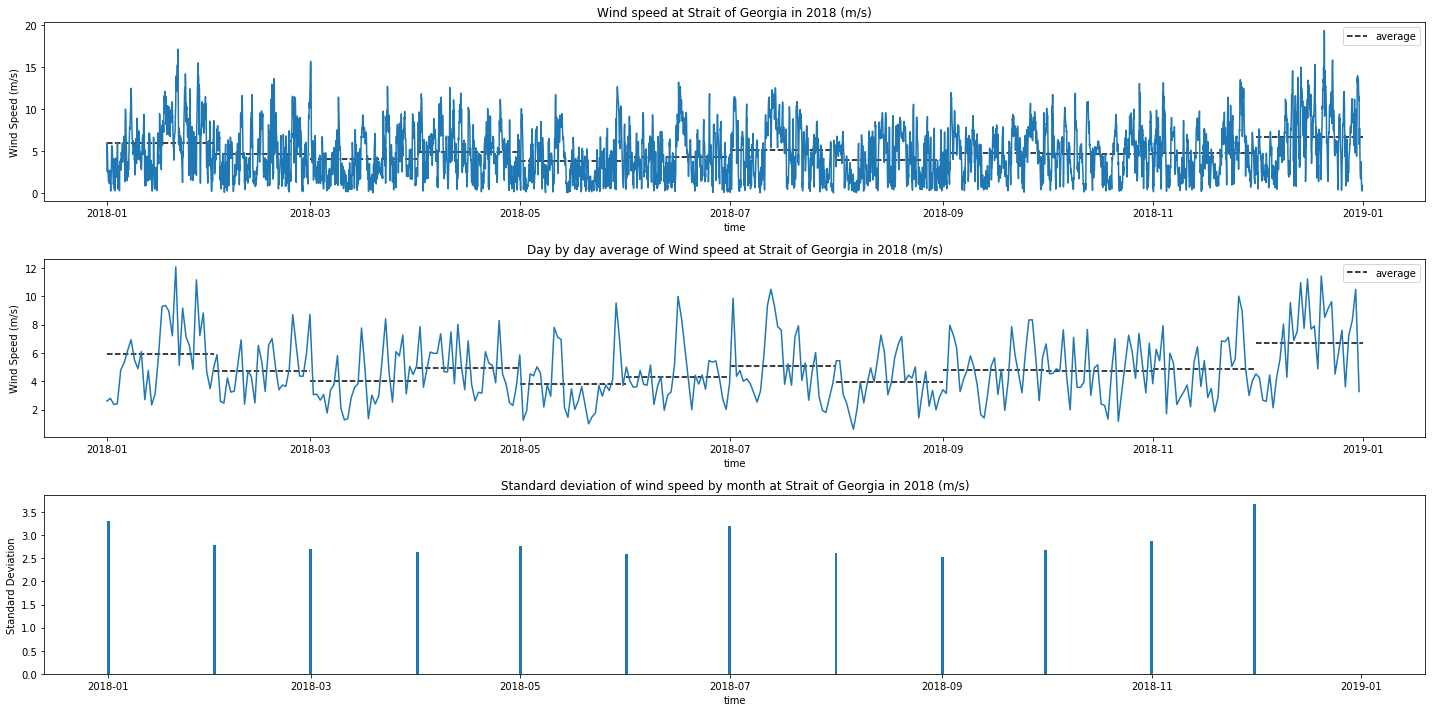

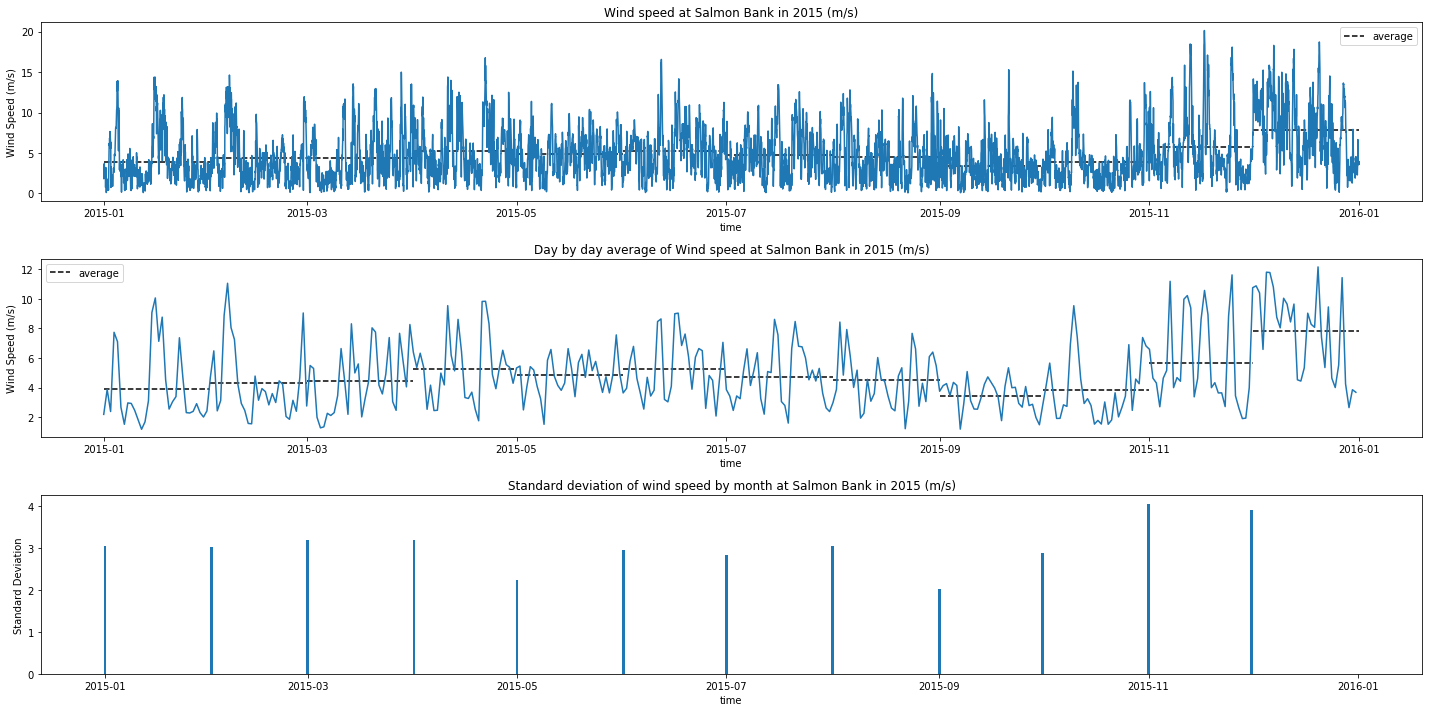

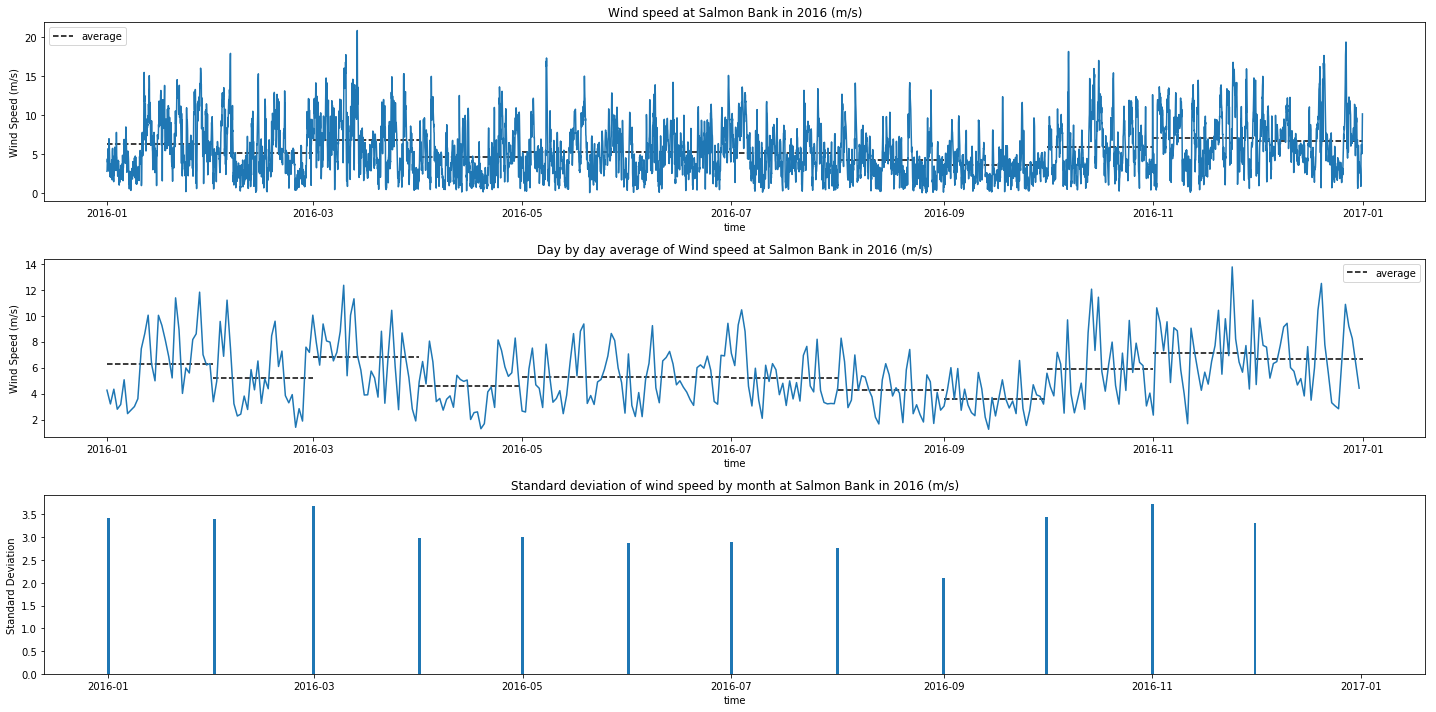

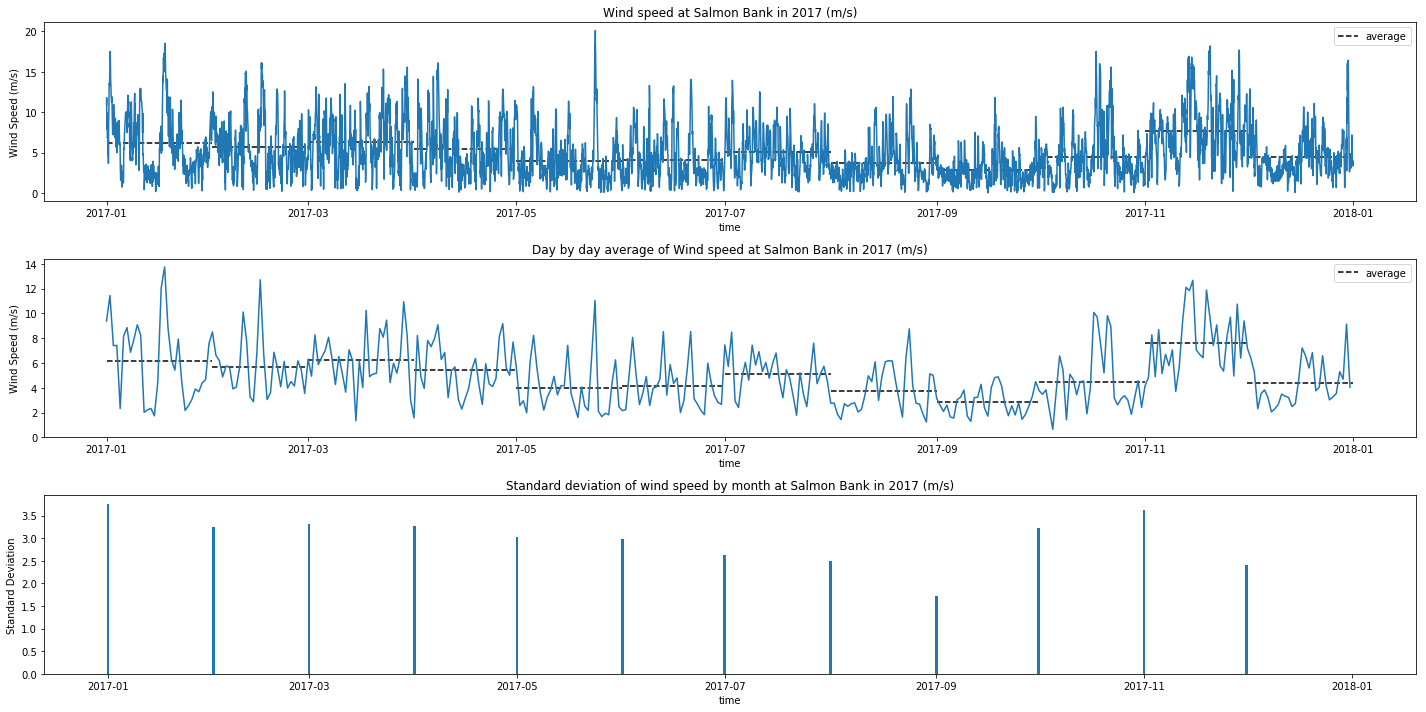

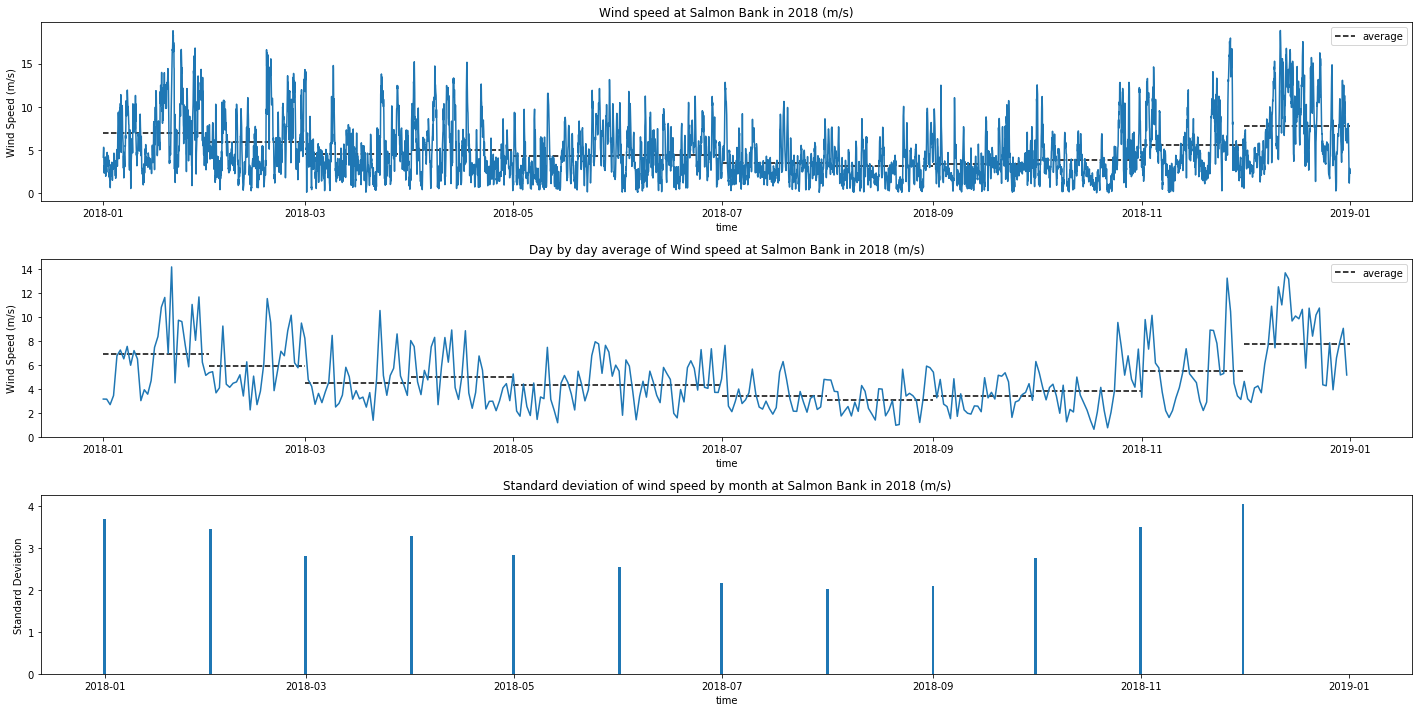

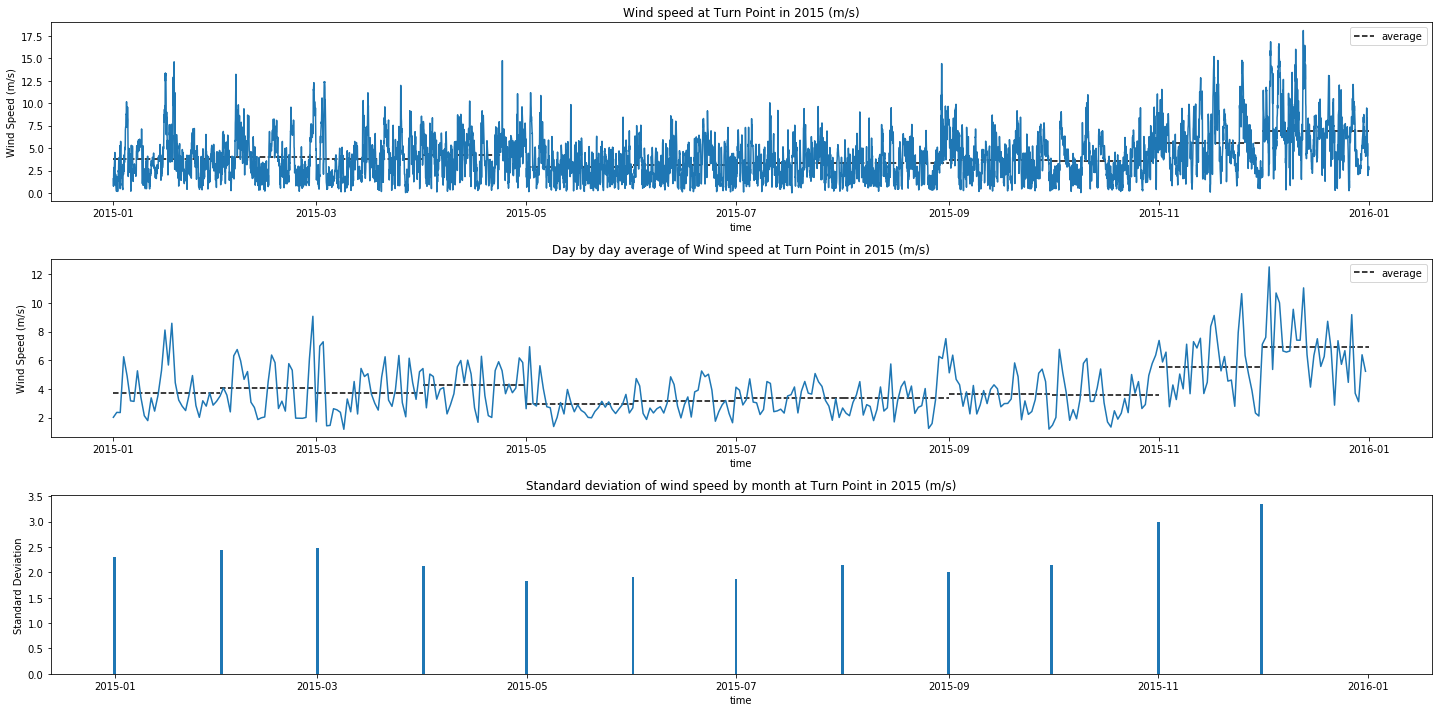

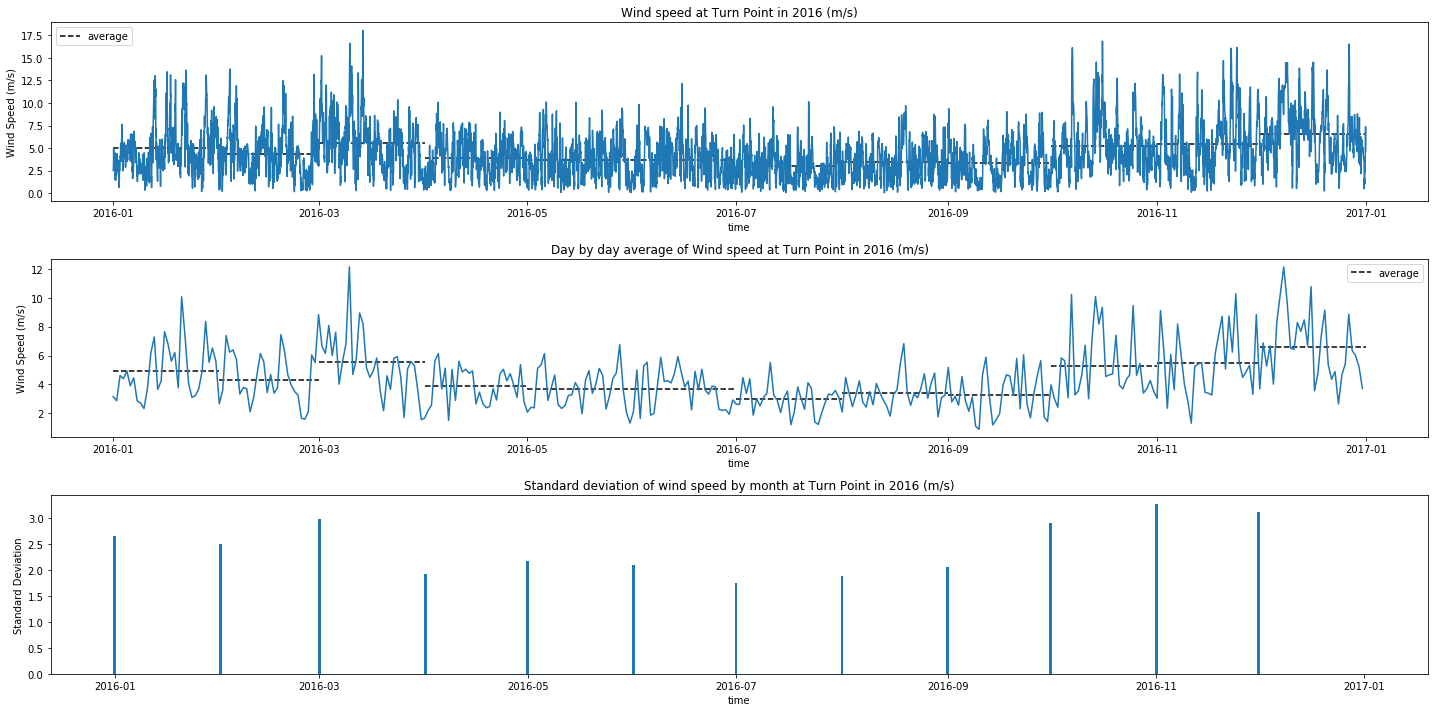

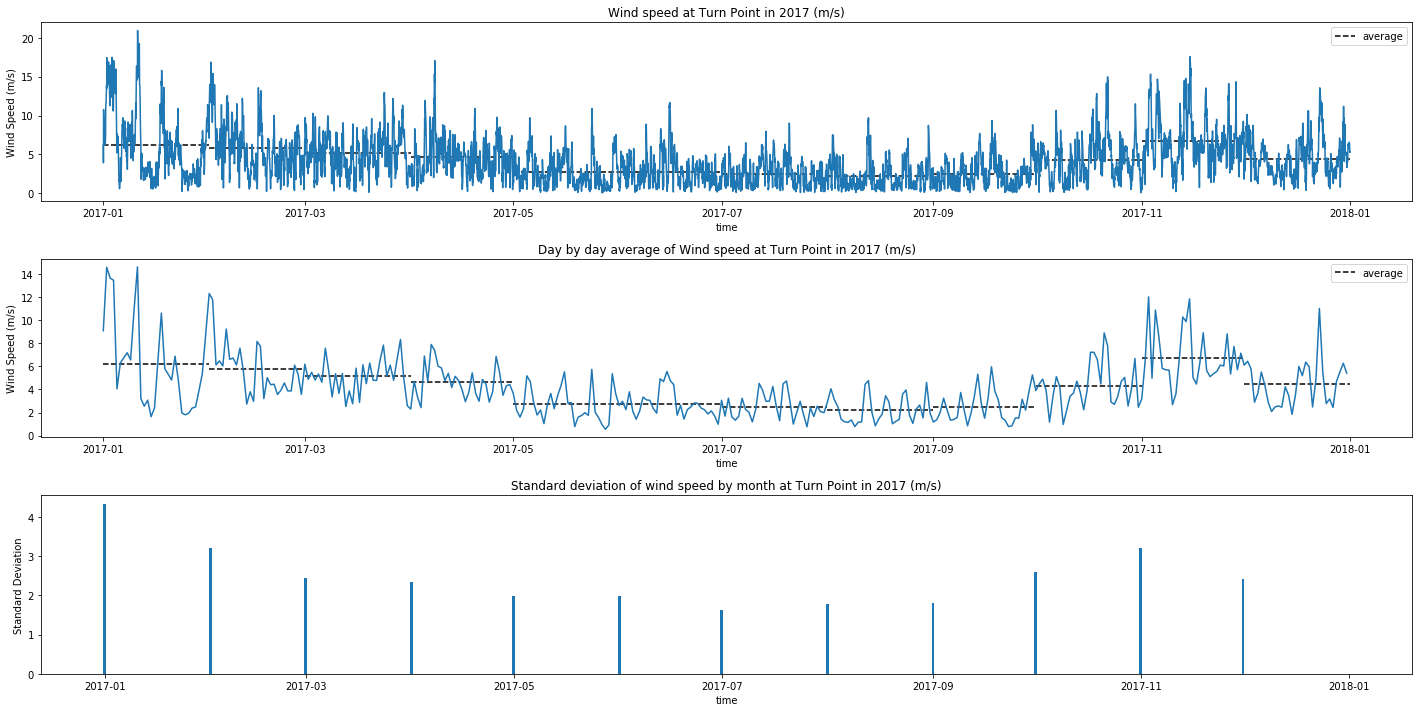

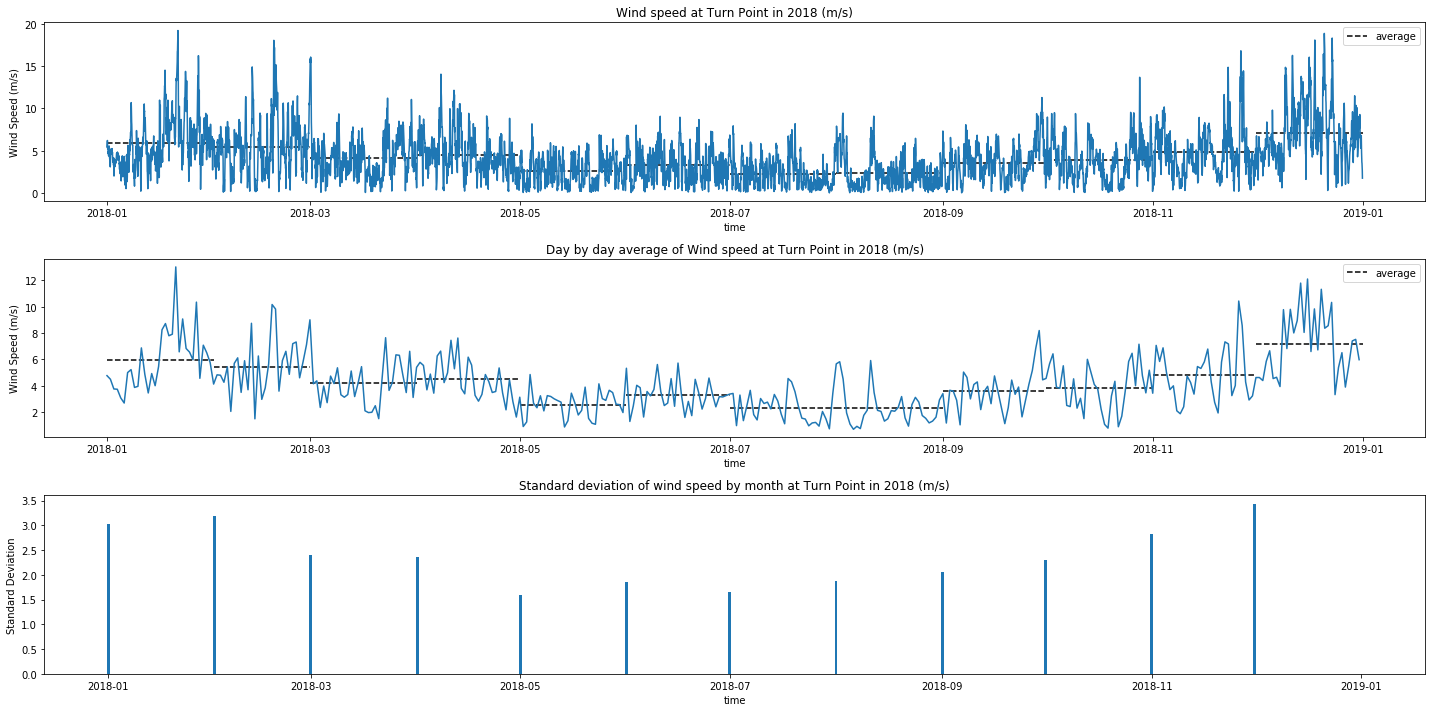

In [165]:
locs = ['sog', 'salmon', 'turn']
locations = ['Strait of Georgia', 'Salmon Bank', 'Turn Point']
years = [2015,2016,2017,2018] 
for index in range(3):
    all_times = []
    all_means = []
    all_std = []
    for year in years: 
        wind_array = "winds_{}{}".format(locs[index], str(year))
        times = "t_{}{}".format(locs[index], str(year))
        
        mean_month = average_output(locals()[wind_array],locals()[times], 'M')[1]
        
                
        fig = plt.figure(figsize=(20,10))
        
        plt.subplot(3,1,1)
        plt.plot(locals()[times], locals()[wind_array])
        plt.xlabel('time')
        plt.ylabel('Wind Speed (m/s)')
        for month in range(1, 13):
            if month != 12:
                plt.hlines(mean_month[month-1], xmin = datetime.datetime(year, month, 1, 0, 0 ,0),xmax =  datetime.datetime(year, month + 1, 1, 0, 0 ,0), linestyles = 'dashed')
            else:
                plt.hlines(mean_month[month-1], datetime.datetime(year, month, 1, 0, 0 ,0), datetime.datetime(year + 1 , 1, 1, 0, 0 ,0), linestyles = 'dashed', label = 'average')
                
        plt.legend()
        title = 'Wind speed at {} in {} (m/s)'.format(locations[index], year)
        plt.title(title)
        
        plt.subplot(3,1,2)
        data = average_output(locals()[wind_array],locals()[times], 'D')
        plt.plot(data[0], data[1])
        plt.xlabel('time')
        plt.ylabel('Wind Speed (m/s)')
        for month in range(1, 13):
            if month != 12:
                plt.hlines(mean_month[month-1], xmin = datetime.datetime(year, month, 1, 0, 0 ,0),xmax =  datetime.datetime(year, month + 1, 1, 0, 0 ,0), linestyles = 'dashed')
            else:
                plt.hlines(mean_month[month-1], datetime.datetime(year, month, 1, 0, 0 ,0), datetime.datetime(year + 1 , 1, 1, 0, 0 ,0), linestyles = 'dashed', label = 'average')
        plt.legend()
        title = 'Day by day average of Wind speed at {} in {} (m/s)'.format(locations[index], year)
        plt.title(title)
        plt.subplot(3,1,3)
        std_devs = std_dev_output(locals()[wind_array],locals()[times], 'M')

        plt.bar(np.append(std_devs[0],np.array([datetime.datetime(year + 1, 1,1, 0, 0)])), np.append(np.asarray(std_devs[1]), np.array([0])))
        plt.xlabel('time')
        plt.ylabel('Standard Deviation')
        title = 'Standard deviation of wind speed by month at {} in {} (m/s)'.format(locations[index], year)
        plt.title(title)
        plt.tight_layout()
        
        
        
        all_times.extend(std_devs[0])
        all_means.extend(mean_month)
        all_std.extend(std_devs[1])
    rows = zip(all_times, all_means, all_std)
    with open('{}wind.csv'.format(locs[index]), "w") as f:
        writer = csv.writer(f)
        writer.writerow(['date','mean','standard deviation'])
        for row in rows:
            writer.writerow(row)